In [1]:
import os
import json
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

from minima_volume.analysis_funcs import (  grab_folder_names,
                                            load_base_train_size,
                                            list_additional_data,
                                            load_param_num,
                                            multiple_minima_fixed_landscape,
                                            fixed_landscape_minima_labels,
                                            plot_fixed_landscape_minima_pair,
                                            model_volume_across_targets,
                                            append_cutoff_points,
                                            varying_landscape_minima_labels,
                                            plot_minima_volume_vs_data_level,                    
)

problem_name = "MNIST"

loss_value = .1  # Loss value to analyze
data_level_log = False #Is the data log distributed?
base_output_dir = "analysis"  # Root folder to save all plots
os.makedirs(base_output_dir, exist_ok=True)

# Data for the loss landscape levels
experiment_folders, data_modifications = grab_folder_names()
data_modifications = ['data_0']

base_train_size = load_base_train_size(experiment_folders[0])
model_data_sizes = list_additional_data(experiment_folders[0])
num_params = load_param_num(experiment_folders[0], data_modifications[0], loss_value = loss_value)

base_shift = 0
if data_modifications[0].startswith("data_"):
    base_shift = base_train_size  # Shift to reflect true dataset size

print("Experiment folders: ", experiment_folders)
print("Different data levels where loss landscapes were computed:", data_modifications)
print("The base train size is: ", base_train_size)
print("Data levels where models were trained: ", model_data_sizes)
print("The number of model parameters is ", num_params)

First entry: Model_0, base_train_size = 50
Experiment folders:  ['model_40_data_10', 'model_0_data_10', 'model_22_data_10', 'model_32_data_10', 'model_14_data_10', 'model_49_data_10', 'model_9_data_10', 'model_15_data_10', 'model_8_data_10', 'model_48_data_10', 'model_1_data_10', 'model_41_data_10', 'model_33_data_10', 'model_23_data_10', 'model_17_data_10', 'model_38_data_10', 'model_28_data_10', 'model_21_data_10', 'model_31_data_10', 'model_3_data_10', 'model_43_data_10', 'model_30_data_10', 'model_20_data_10', 'model_42_data_10', 'model_2_data_10', 'model_16_data_10', 'model_29_data_10', 'model_39_data_10', 'model_13_data_10', 'model_25_data_10', 'model_35_data_10', 'model_47_data_10', 'model_7_data_10', 'model_34_data_10', 'model_24_data_10', 'model_6_data_10', 'model_46_data_10', 'model_12_data_10', 'model_4_data_10', 'model_44_data_10', 'model_26_data_10', 'model_36_data_10', 'model_19_data_10', 'model_10_data_10', 'model_11_data_10', 'model_45_data_10', 'model_5_data_10', 'mode

In [2]:
# Preparation for the specific plots
import matplotlib as mpl

#cmap = mpl.colormaps.get_cmap("winter")  # blue → green
#background_colors = [cmap(i) for i in np.linspace(0, 1, 10)]

#natural_label = "Minima (On Base Dataset)"
other_label = "Minima (Larger Datasets)"

In [3]:
for data_modification in data_modifications:
    print(f"\nProcessing data modification folder: {data_modification}")

    # Create output folder for this data_modification
    save_dir = os.path.join(base_output_dir, data_modification)
    os.makedirs(save_dir, exist_ok=True)

    # Get axis labels and titles
    labels = fixed_landscape_minima_labels(data_modification, base_train_size)

    # Extract minima landscapes
    all_mdl, all_log_rn, all_test_loss, all_test_acc = multiple_minima_fixed_landscape(
        experiment_folders, data_modification, loss_value #mdl is modification data level
    )
    print(all_log_rn)
    print(all_test_acc)


Processing data modification folder: data_0
[[5232.972552155437], [5487.757402460011], [4963.819187731594], [4229.095846895402], [2657.2214112074766], [4848.154233197329], [6037.6264696831], [3452.494772142851], [3459.7540230769177], [5037.932470105016], [4855.686505167267], [4166.692045267133], [3678.2556607932825], [5729.022089454551], [4201.375508810254], [4843.225848392644], [5896.737709058755], [4838.701807989801], [4030.9687643939546], [4382.889149449832], [2820.9206298469217], [3779.503404517025], [4603.779335028389], [3687.3755606853715], [4609.273829893479], [3720.1326243291182], [3908.3989077288925], [4709.918958936101], [3316.483183165406], [5675.277129894389], [6091.328787235295], [6563.896690856829], [4713.214445409793], [4164.304301718174], [3944.997995416744], [5667.988951979352], [5389.278591520626], [3525.0339819285973], [3040.634127797642], [2451.3277117250623], [5224.608919049267], [3733.3578395437357], [4885.377366445946], [5116.770095998369], [3236.2828108456633],

In [4]:
all_log_rn_list = [val for sublist in all_log_rn for val in sublist]
all_test_acc_list = [val for sublist in all_test_acc for val in sublist]

print(all_log_rn_list)
print(all_test_acc_list)

[5232.972552155437, 5487.757402460011, 4963.819187731594, 4229.095846895402, 2657.2214112074766, 4848.154233197329, 6037.6264696831, 3452.494772142851, 3459.7540230769177, 5037.932470105016, 4855.686505167267, 4166.692045267133, 3678.2556607932825, 5729.022089454551, 4201.375508810254, 4843.225848392644, 5896.737709058755, 4838.701807989801, 4030.9687643939546, 4382.889149449832, 2820.9206298469217, 3779.503404517025, 4603.779335028389, 3687.3755606853715, 4609.273829893479, 3720.1326243291182, 3908.3989077288925, 4709.918958936101, 3316.483183165406, 5675.277129894389, 6091.328787235295, 6563.896690856829, 4713.214445409793, 4164.304301718174, 3944.997995416744, 5667.988951979352, 5389.278591520626, 3525.0339819285973, 3040.634127797642, 2451.3277117250623, 5224.608919049267, 3733.3578395437357, 4885.377366445946, 5116.770095998369, 3236.2828108456633, 3206.0249380782625, 1859.8836303439666, 5416.4250234228175, 5126.728033419385, 3200.9218777495385]
[0.72525, 0.79025, 0.74125, 0.72525

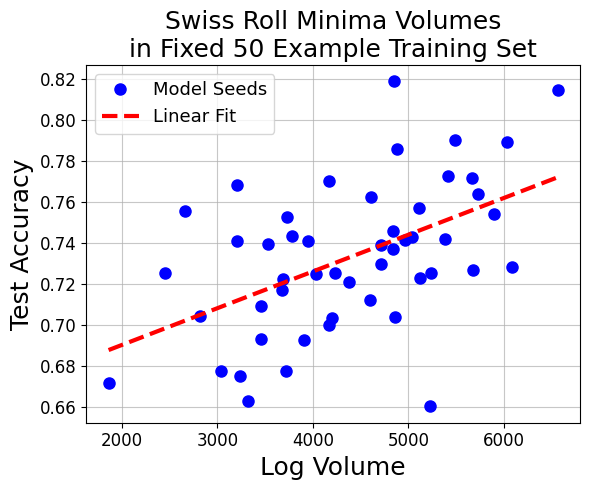

In [5]:
from minima_volume.volume_funcs import plot_pair_metrics


plot_pair_metrics(
    # metric1_values=all_test_loss_list,
    metric1_values=all_log_rn_list,
    metric2_values=all_test_acc_list,
    # metric2_values=all_log_rn_list,
    # xlabel="Test Loss",
    xlabel="Log Volume",
    ylabel="Test Accuracy",
    # ylabel="Log Volume",
    title="Swiss Roll Minima Volumes\nin Fixed 50 Example Training Set",
    display=True,
    connect_dots=False,
    label='Model Seeds',
    show_best_fit=True,
    xlabel_size=18, ylabel_size=18, title_size=18, legend_size = 13,
    alpha=0.7
)